# IPL First Innings Score Prediction

                                                                                          Name - B.Sai Pavan Kumar
                                                                                          Roll no - AM.EN.U4CSE19214

# Problem Definition

As we know Cricket is the foremost loved game, after football and most 
loved game in our India. There are many people who tries to predict the 
scores of matches based on their individual cricket sense. Cricket has certain 
rules and game system. When a cricket match is played many factors comes 
into consideration such as venue, players performance etc.  
                                                In this project we are going to predict final score 
of a team in a match by analyzing data of previous matches. We use features 
such as current score and no of wickets and score in last few overs. Our 
system finally present quantitative results displayed by best suitable 
algorithm having highest accuracy. 
 Cricket is a sport with multiple formats, different playing standards and 
varying duration. T20 and ODI are two limited overs formats among them. 
We try to predict scores in these two formats in our project.

### Datasets

-> We have found suitable datasets required for our project in Kaggle website. 

The data is about previous records of ball-to-ball information mapped by a 
batsman to a bowler which includes runs, wickets, overs, runs scored in last 5 
overs, wickets for last 5 overs, strike, non-striker. 
                The datasets are being used by various cricket teams to plan against opponent 
team players to compare their stats against their bowlers and viceversa.

Our Datasets are IPL,ODI and T20 scores datasets

## Prepare Data

#### Data Loading

In [12]:
# Importing essential libraries
import pandas as pd

# Loading the dataset
data = pd.read_csv('t20.csv')

In [13]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2005-06-13,The Rose Bowl,England,Australia,ME Trescothick,B Lee,0,0,0.1,0,0,0,0,179
1,1,2005-06-13,The Rose Bowl,England,Australia,ME Trescothick,B Lee,1,0,0.2,1,0,1,0,179
2,1,2005-06-13,The Rose Bowl,England,Australia,GO Jones,B Lee,1,0,0.3,1,0,1,0,179
3,1,2005-06-13,The Rose Bowl,England,Australia,GO Jones,B Lee,1,0,0.4,1,0,1,0,179
4,1,2005-06-13,The Rose Bowl,England,Australia,GO Jones,B Lee,1,0,0.5,1,0,1,0,179


#### Pre-Processing

In [14]:
data.describe(include='all')

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,180777.000000,180777,180777,180777,180777,180777,180777,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000
unique,NaN,1060,114,67,66,1255,931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2016-07-22,M Chinnaswamy Stadium,Mumbai Indians,Delhi Daredevils,SK Raina,SL Malinga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,983,8063,10213,10245,2580,2203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,736.844726,NaN,NaN,NaN,NaN,NaN,NaN,74.553195,2.564541,9.767688,32.898798,1.193847,24.154953,8.163511,158.308225
std,425.421789,NaN,NaN,NaN,NaN,NaN,NaN,48.530296,2.101655,5.768688,14.769098,1.077084,19.559632,10.043627,30.457209
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,368.000000,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,1.000000,4.600000,24.000000,0.000000,9.000000,1.000000,139.000000
50%,737.000000,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,4.000000,159.000000
75%,1105.000000,NaN,NaN,NaN,NaN,NaN,NaN,110.000000,4.000000,14.600000,43.000000,2.000000,34.000000,12.000000,179.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180777 entries, 0 to 180776
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             180777 non-null  int64  
 1   date            180777 non-null  object 
 2   venue           180777 non-null  object 
 3   bat_team        180777 non-null  object 
 4   bowl_team       180777 non-null  object 
 5   batsman         180777 non-null  object 
 6   bowler          180777 non-null  object 
 7   runs            180777 non-null  int64  
 8   wickets         180777 non-null  int64  
 9   overs           180777 non-null  float64
 10  runs_last_5     180777 non-null  int64  
 11  wickets_last_5  180777 non-null  int64  
 12  striker         180777 non-null  int64  
 13  non-striker     180777 non-null  int64  
 14  total           180777 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 20.7+ MB


In [16]:
# --- Data Cleaning ---
# Removing unwanted columns to make sure the variables which are not needed in generating model are being removed
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
data.drop(labels=columns_to_remove, axis=1, inplace=True)

In [17]:
data['bat_team'].unique()

array(['England', 'Australia', 'South Africa', 'Sri Lanka', 'West Indies',
       'Kenya', 'Pakistan', 'India', 'New Zealand', 'Bangladesh',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils', 'Bermuda',
       'Scotland', 'Ireland', 'Afghanistan', 'Zimbabwe', 'Canada',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Brisbane Heat',
       'Melbourne Stars', 'Adelaide Strikers', 'Hobart Hurricanes',
       'Melbourne Renegades', 'Sydney Sixers', 'Perth Scorchers',
       'Sydney Thunder', 'Netherlands', 'Sunrisers Hyderabad', 'Nepal',
       'United Arab Emirates', 'Hong Kong', 'Papua New Guinea', 'Oman',
       'Nottinghamshire', 'Worcestershire', 'Somerset', 'Surrey',
       'Lancashire', 'Middlesex', 'Derbyshire', 'Leicestershire',
       'Warwickshire', 'Glamorgan', 'Durham', 'Sussex', 'Hampshire',
       'Yorkshire', 'Essex', 'Kent', 'Glo

In [18]:
# Keeping only consistent teams
#These are array of teams that are currently not playing in IPL
consistent_teams = ['India', 'Australia', 'England',
                    'Sri Lanka', 'South Africa', 'West Indies',
                    'Bangladesh', 'Pakistan']

In [19]:
#Dropping all other teams instead of these consistent teams from both batting and bowling rows
data = data[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]

In [20]:
# Removing the first 5 overs data in every match to avoid the false prediction
# We cant predict the score by seeing the score in 5 overs we need 
# atleast 5+ overs to estimate considering real world situation
data = data[data['overs']>=5.0]

In [21]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
34,2005-06-13,England,Australia,44,1,5.1,43,1,179
35,2005-06-13,England,Australia,44,1,5.2,42,1,179
36,2005-06-13,England,Australia,48,1,5.3,44,1,179
37,2005-06-13,England,Australia,49,1,5.4,45,1,179
38,2005-06-13,England,Australia,49,2,5.5,45,2,179


In [22]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [23]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_data = pd.get_dummies(data=data, columns=['bat_team', 'bowl_team'])
# Here we cannot apply teams directly so instead i hard coded all the teams in dataset
# 1 if it is batting or bowling or else 0

In [24]:
encoded_data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Australia,bat_team_Bangladesh,bat_team_England,...,bat_team_Sri Lanka,bat_team_West Indies,bowl_team_Australia,bowl_team_Bangladesh,bowl_team_England,bowl_team_India,bowl_team_Pakistan,bowl_team_South Africa,bowl_team_Sri Lanka,bowl_team_West Indies
34,2005-06-13,44,1,5.1,43,1,179,0,0,1,...,0,0,1,0,0,0,0,0,0,0
35,2005-06-13,44,1,5.2,42,1,179,0,0,1,...,0,0,1,0,0,0,0,0,0,0
36,2005-06-13,48,1,5.3,44,1,179,0,0,1,...,0,0,1,0,0,0,0,0,0,0
37,2005-06-13,49,1,5.4,45,1,179,0,0,1,...,0,0,1,0,0,0,0,0,0,0
38,2005-06-13,49,2,5.5,45,2,179,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [25]:
encoded_data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Australia', 'bat_team_Bangladesh',
       'bat_team_England', 'bat_team_India', 'bat_team_Pakistan',
       'bat_team_South Africa', 'bat_team_Sri Lanka', 'bat_team_West Indies',
       'bowl_team_Australia', 'bowl_team_Bangladesh', 'bowl_team_England',
       'bowl_team_India', 'bowl_team_Pakistan', 'bowl_team_South Africa',
       'bowl_team_Sri Lanka', 'bowl_team_West Indies'],
      dtype='object')

In [28]:
# Rearranging the columns so target value will be at last
encoded_data = encoded_data[['date', 'bat_team_India', 'bat_team_Australia', 'bat_team_England',
              'bat_team_Sri Lanka', 'bat_team_West Indies', 'bat_team_South Africa',
              'bat_team_Bangladesh', 'bat_team_Pakistan',
              'bowl_team_India', 'bowl_team_Australia', 'bowl_team_England',
              'bowl_team_Sri Lanka', 'bowl_team_West Indies', 'bowl_team_South Africa',
              'bowl_team_Bangladesh', 'bowl_team_Pakistan',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [29]:
encoded_data.head()

,date,bat_team_India,bat_team_Australia,bat_team_England,bat_team_Sri Lanka,bat_team_West Indies,bat_team_South Africa,bat_team_Bangladesh,bat_team_Pakistan,bowl_team_India,...,bowl_team_West Indies,bowl_team_South Africa,bowl_team_Bangladesh,bowl_team_Pakistan,overs,runs,wickets,runs_last_5,wickets_last_5,total
34,2005-06-13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.1,44,1,43,1,179
35,2005-06-13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.2,44,1,42,1,179
36,2005-06-13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.3,48,1,44,1,179
37,2005-06-13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.4,49,1,45,1,179
38,2005-06-13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.5,49,2,45,2,179


### Summarization

In [30]:
encoded_data.shape

(24170, 23)

In [31]:
encoded_data.columns

Index(['date', 'bat_team_India', 'bat_team_Australia', 'bat_team_England',
       'bat_team_Sri Lanka', 'bat_team_West Indies', 'bat_team_South Africa',
       'bat_team_Bangladesh', 'bat_team_Pakistan', 'bowl_team_India',
       'bowl_team_Australia', 'bowl_team_England', 'bowl_team_Sri Lanka',
       'bowl_team_West Indies', 'bowl_team_South Africa',
       'bowl_team_Bangladesh', 'bowl_team_Pakistan', 'overs', 'runs',
       'wickets', 'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [32]:
encoded_data.describe()

,bat_team_India,bat_team_Australia,bat_team_England,bat_team_Sri Lanka,bat_team_West Indies,bat_team_South Africa,bat_team_Bangladesh,bat_team_Pakistan,bowl_team_India,bowl_team_Australia,...,bowl_team_West Indies,bowl_team_South Africa,bowl_team_Bangladesh,bowl_team_Pakistan,overs,runs,wickets,runs_last_5,wickets_last_5,total
count,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,...,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000
mean,0.137402,0.150269,0.116467,0.134547,0.122507,0.138064,0.048779,0.151965,0.100703,0.157013,...,0.115308,0.116632,0.080265,0.156516,12.288287,94.108978,3.337733,38.082913,1.432023,157.558171
std,0.344278,0.357342,0.320790,0.341246,0.327878,0.344974,0.215411,0.358995,0.300942,0.363820,...,0.319400,0.320988,0.271708,0.363352,4.312058,40.956796,2.033279,11.817540,1.091055,32.185900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,12.000000,0.000000,9.000000,0.000000,58.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.500000,61.000000,2.000000,29.000000,1.000000,135.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,12.300000,89.000000,3.000000,37.000000,1.000000,157.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,16.100000,122.000000,5.000000,46.000000,2.000000,179.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,19.600000,263.000000,10.000000,89.000000,8.000000,263.000000


# Visualization

Text(0.5, 1.0, 'Total score Distribution Plot')

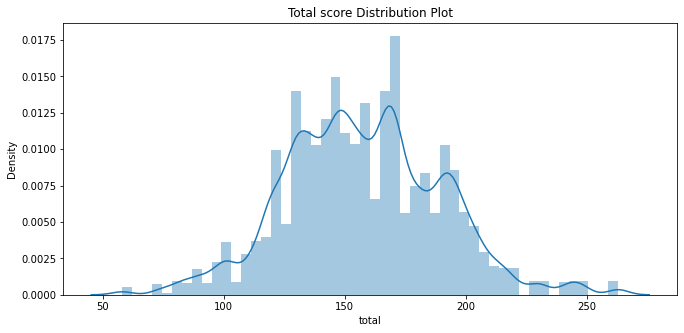

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# This makes it very easy to spot anomalies, such as outliers
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(encoded_data['total'])
plt.title('Total score Distribution Plot')

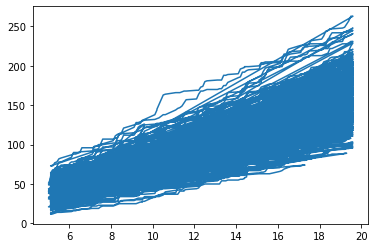

In [34]:
plt.plot(encoded_data.overs,encoded_data.runs)
plt.show()

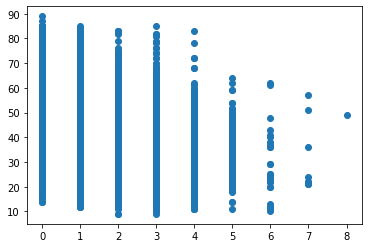

In [35]:
plt.scatter(encoded_data.wickets_last_5,encoded_data.runs_last_5)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd040ac610>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd040acd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd040ac2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd040bb400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd040bb760>],
 'means': []}

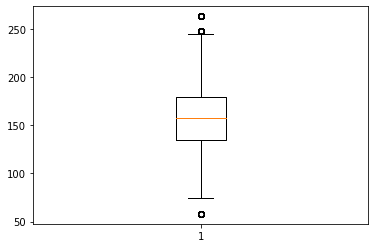

In [36]:
plt.boxplot(encoded_data.total)

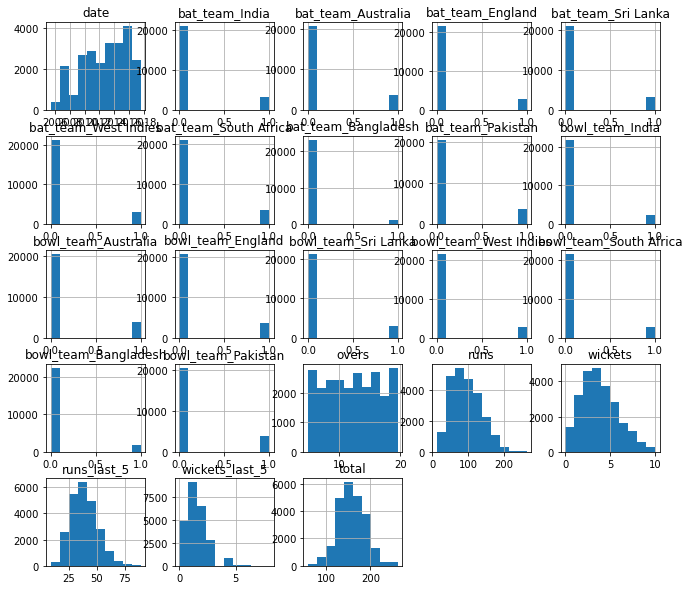

In [37]:
encoded_data.hist(figsize=[11,10])
plt.show()

<AxesSubplot:title={'center':'runs and total'}, xlabel='total', ylabel='runs'>

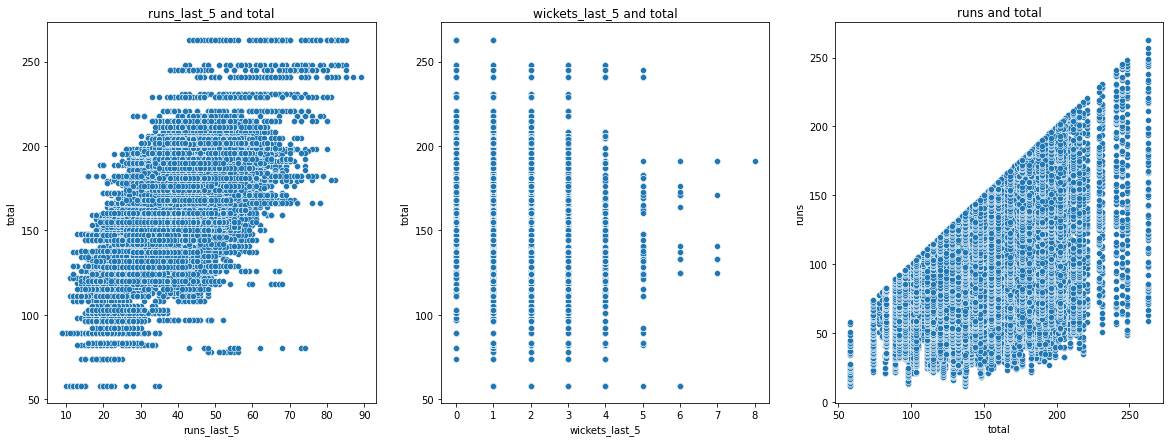

In [38]:
import seaborn as sns
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("runs_last_5 and total")
sns.scatterplot(x='runs_last_5',y='total',data=encoded_data)
plt.subplot(1,3,2)
plt.title("wickets_last_5 and total")
sns.scatterplot(x='wickets_last_5',y='total',data=encoded_data)
plt.subplot(1,3,3)
plt.title("runs and total")
sns.scatterplot(y='runs',x='total',data=encoded_data)

### Python packages 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

### Supervised/unsupervised Learning Algorithms 

In [40]:
#In datasets related to time and date we have to split train and test sample based on date.
# I have seperated dataset based on year 2017 i.e => after 2016 comes under testing and remaining under training
X_train = encoded_data.drop(labels='total', axis=1)[encoded_data['date'].dt.year <= 2016]
X_test = encoded_data.drop(labels='total', axis=1)[encoded_data['date'].dt.year >= 2017]

In [41]:
y_train = encoded_data[encoded_data['date'].dt.year <= 2016]['total'].values
y_test = encoded_data[encoded_data['date'].dt.year >= 2017]['total'].values

In [42]:
#Removing date column as we dont need that to train model
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [43]:
# Data to be used for k-fold
X = X_train.append(X_test)
X = X.values
y = np.concatenate([y_train,y_test])

In [44]:
#To find accuracy of our model
def custom_accuracy(y_test,y_pred,thresold):
    ans = 0
    n = len(y_pred)
    for i in range(n):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            ans += 1
    return ((ans/n)*100)

#### KNN Implementation

In [45]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

k_acc = custom_accuracy(y_test,y_pred,20)
print("Custom accuracy for knn:" , k_acc)

Custom accuracy for knn: 66.27288836385115


#### KNN Implementation from scratch

In [46]:
def euclidDistance(a,b):
    return np.linalg.norm(a-b)

In [47]:
def nearestNeighbors(trainingData,testSample,k):
    distances = []
    for x in trainingData:
        distances.append([x,euclidDistance(x[0:testSample.shape[0]],testSample)])
    distances.sort(key = lambda x : x[-1])
    distances = np.array(distances, dtype = 'object')
    return distances[0:k]

In [48]:
def predict(trainingData,testData,k):
    res = []
    for x in testData:
        neighbors = nearestNeighbors(trainingData,x,k)
        values = []
        for y in neighbors:
            values.append(y[0][-1])
        res.append(max(set(values),key = values.count))
    return res

In [49]:
trainingData = np.column_stack((np.array(X_train.values),np.array(y_train))) 
testingData = np.array(X_test.values[0:30])
pred = predict(trainingData,testingData,5)
print("Custom accuracy for KNN(scratch):" , custom_accuracy(y_test,pred,20))

Custom accuracy for KNN(scratch): 10.0


K-fold cross validation

In [50]:
kf = KFold(n_splits=10, random_state=None) 
accuracy = []
avg_a = 0
max_a = 0
min_a = 100

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(x1, y1)
    y3 = knn.predict(x2)
    
    accu = custom_accuracy(y2,y3,20)
    accuracy += [accu]
    max_a = max(max_a,accu)
    min_a = min(min_a,accu)
    avg_a += accu
    
print("Accuracies -",accuracy)
print("Maximum Accuracy -",max_a)
print("Minimum Accuracy -",min_a)
print("Average Accuracy -",avg_a/10)

Accuracies - [59.04013239553165, 64.54282167976831, 60.033098882912704, 64.66694249069094, 64.04633843607779, 61.02606537029375, 59.90897807199007, 59.122879602813406, 60.943318163011995, 62.68100951592884]
Maximum Accuracy - 64.66694249069094
Minimum Accuracy - 59.04013239553165
Average Accuracy - 61.60115846090194


#### Linear regression

In [51]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = lr.score(X_test,y_test)*100
l_acc = custom_accuracy(y_test,y_pred,20)

print("R square value:" , score)
print("Custom accuracy for linear regression:" , l_acc)

R square value: 65.93639183137462
Custom accuracy for linear regression: 86.06024808033077


K-fold cross validation

In [52]:
kf = KFold(n_splits=10, random_state=None) 
accuracy = []
avg_a = 0
max_a = 0
min_a = 100

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    lr = LinearRegression()
    lr.fit(x1, y1)
    y3 = lr.predict(x2)
    
    accu = custom_accuracy(y2,y3,20)
    accuracy += [accu]
    max_a = max(max_a,accu)
    min_a = min(min_a,accu)
    avg_a += accu
    
print("Accuracies -",accuracy)
print("Maximum Accuracy -",max_a)
print("Minimum Accuracy -",min_a)
print("Average Accuracy -",avg_a/10)

Accuracies - [76.58254033926355, 82.91270169631775, 77.16177079023583, 72.85891601158461, 79.52006619776583, 73.9346297062474, 73.35539925527513, 69.21803889118743, 71.86594952420356, 81.75424079437319]
Maximum Accuracy - 82.91270169631775
Minimum Accuracy - 69.21803889118743
Average Accuracy - 75.91642532064543


### RandomForest Regressor

In [53]:
rf = RandomForestRegressor(n_estimators=100,max_features=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test,y_test)*100
r_acc = custom_accuracy(y_test,y_pred,20)

print("R square value:" , score)
print("Custom accuracy for linear regression:" , r_acc)

R square value: 60.197110093651354
Custom accuracy for linear regression: 76.19610159480213


K-fold cross validation

In [54]:
kf = KFold(n_splits=10, random_state=None) 
accuracy = []
avg_a = 0
max_a = 0
min_a = 100

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    rf = RandomForestRegressor(n_estimators=100,max_features=None)
    rf.fit(x1, y1)
    y3 = rf.predict(x2)
    
    accu = custom_accuracy(y2,y3,20)
    accuracy += [accu]
    max_a = max(max_a,accu)
    min_a = min(min_a,accu)
    avg_a += accu
    
print("Accuracies -",accuracy)
print("Maximum Accuracy -",max_a)
print("Minimum Accuracy -",min_a)
print("Average Accuracy -",avg_a/10)

Accuracies - [67.8113363673976, 73.14853123707074, 68.51468762929251, 67.52172114191146, 73.81050889532477, 69.71452213487794, 69.42490690939181, 69.01117087298304, 64.29458005792304, 69.46628051303269]
Maximum Accuracy - 73.81050889532477
Minimum Accuracy - 64.29458005792304
Average Accuracy - 69.27182457592055


# Accuracy plot

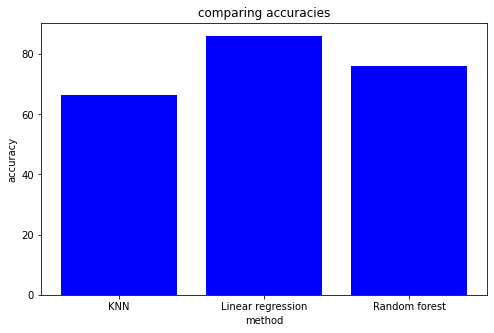

In [55]:
colnames = ["accuracy","names"]
acc = [[k_acc,"KNN"],[l_acc,"Linear regression"],[r_acc,"Random forest"]]

mydataframe = pd.DataFrame(acc,columns=colnames)
plt.figure(figsize=(8,5))
plt.bar("names", "accuracy", data = mydataframe, color = "blue")
plt.xlabel("method")
plt.ylabel("accuracy")
plt.title("comparing accuracies")
plt.show()

# Lets Predict the score

In [56]:
a = np.array([0,1,2,3,4,5,6,7])
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1

In [57]:
for i in range(len(consistent_teams)):
    print(i,consistent_teams[i])
bat_team = int(input("Please input the bat team from the list(0-7): "))
print()
print("You chose: ",consistent_teams[bat_team])
bat_team = b[bat_team]

0 India
1 Australia
2 England
3 Sri Lanka
4 South Africa
5 West Indies
6 Bangladesh
7 Pakistan
Please input the bat team from the list(0-7): 0

You chose:  India


In [58]:
for i in range(len(consistent_teams)):
    print(i,consistent_teams[i])
bowl_team = int(input("Please input the bowl team from the list(0-7): "))
print()
print("You chose: ",consistent_teams[bowl_team])
bowl_team = b[bowl_team]

0 India
1 Australia
2 England
3 Sri Lanka
4 South Africa
5 West Indies
6 Bangladesh
7 Pakistan
Please input the bowl team from the list(0-7): 1

You chose:  Australia


In [59]:
overs = float(input("Please enter the current over(>5.0): "))

runs = int(input("Please enter the current score: "))

wickets = int(input("Please enter the wickets fallen: "))

runs_last_5 = int(input("Please enter the runs scored in last 5 overs: "))

wickets_last_5 = int(input("Please enter the wickets fallen in last 5 overs: "))

Please enter the current over(>5.0): 6.2
Please enter the current score: 62
Please enter the wickets fallen: 2
Please enter the runs scored in last 5 overs: 30
Please enter the wickets fallen in last 5 overs: 2


In [60]:
#making a vector out of the values
data=[]
for i in bat_team:
    data.append(i)
for i in bowl_team:
    data.append(i)
data.append(overs)
data.append(runs)
data.append(wickets)
data.append(runs_last_5)
data.append(wickets_last_5)
data=np.array([data])

In [61]:
print("Predicted Score from all three regressor's are: ")
pred=int(lr.predict(data))
print(pred)
print(int(knn.predict(data)))
print(int(rf.predict(data)))

Predicted Score from all three regressor's are: 
172
172
173


In [62]:
print("So the average score is from {} to {}".format(pred-5,pred+5))

So the average score is from 167 to 177
